In [2]:
import pandas as pd

beatles = pd.read_csv("../data/TheBeatlesCleaned.csv", encoding='utf-8')
beatles.head()


,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.270,0.0665,0.971,173947
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.707,0.3090,0.882,108547
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.635,0.0601,0.835,177133
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.608,0.1290,0.929,145080
4,5,1963,Please Please Me,Boys,0.402,0.860,0.0504,0.607,0.7360,0.822,146440


In [3]:
# inspect
beatles.info()
beatles.describe()
beatles.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            193 non-null    int64  
 1   year          193 non-null    int64  
 2   album         193 non-null    object 
 3   song          193 non-null    object 
 4   danceability  193 non-null    float64
 5   energy        193 non-null    float64
 6   speechiness   193 non-null    float64
 7   acousticness  193 non-null    float64
 8   liveness      193 non-null    float64
 9   valence       193 non-null    float64
 10  duration_ms   193 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 16.7+ KB


id              0
year            0
album           0
song            0
danceability    0
energy          0
speechiness     0
acousticness    0
liveness        0
valence         0
duration_ms     0
dtype: int64

In [4]:
# clean
beatles = beatles.drop_duplicates()
beatles['year'] = beatles['year'].astype(int)
beatles['energy'] = pd.to_numeric(beatles['energy'], errors='coerce')
beatles['energy'].isnull().sum()
print(beatles.dtypes)

id                int64
year              int64
album            object
song             object
danceability    float64
energy          float64
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
duration_ms       int64
dtype: object


In [5]:
# features per album
album_averages = beatles.groupby('album')[['danceability','energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'duration_ms']].mean()
print(album_averages)


                                       danceability    energy  speechiness  \
album                                                                        
A Hard Day's Night                         0.601462  0.609538     0.036538   
Abbey Road                                 0.518000  0.457176     0.047312   
Beatles for Sale                           0.592286  0.596429     0.038107   
Help!                                      0.528000  0.610929     0.038400   
Let It Be                                  0.520417  0.545917     0.066733   
Magical Mystery Tour                       0.467727  0.486545     0.053691   
Please Please Me                           0.547929  0.599786     0.038979   
Revolver                                   0.482429  0.530571     0.039271   
Rubber Soul                                0.587786  0.539357     0.043543   
Sgt. Pepper's Lonely Hearts Club Band      0.515385  0.482538     0.050223   
The Beatles (white album)                  0.502567  0.503810   

In [6]:
# importing more libraries
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/20/_l_bvg0n1sn87m86nw5jlvh40000gn/T/ipykernel_39442/3681091278.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=beatles, x= 'year', y= 'energy', ci= None, color ='purple')
/var/folders/20/_l_bvg0n1sn87m86nw5jlvh40000gn/T/ipykernel_39442/3681091278.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=beatles, x= 'year', y= 'valence', ci= None, color ='turquoise')


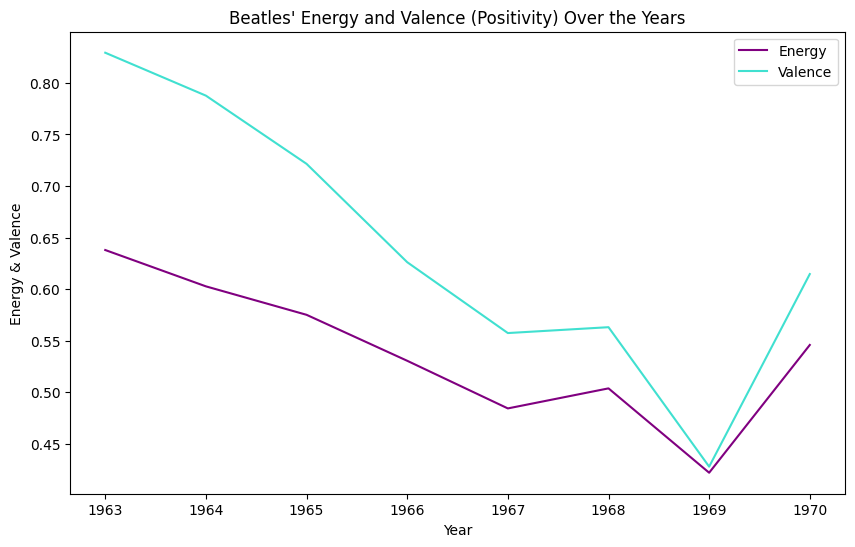

In [72]:
# energy & valence line plot
plt.figure(figsize= (10,6))
sns.lineplot(data=beatles, x= 'year', y= 'energy', ci= None, color ='purple')
sns.lineplot(data=beatles, x= 'year', y= 'valence', ci= None, color ='turquoise')
plt.title("Beatles' Energy and Valence (Positivity) Over the Years")
plt.xlabel('Year')
plt.ylabel('Energy & Valence')
plt.legend(['Energy', 'Valence'])
plt.show()

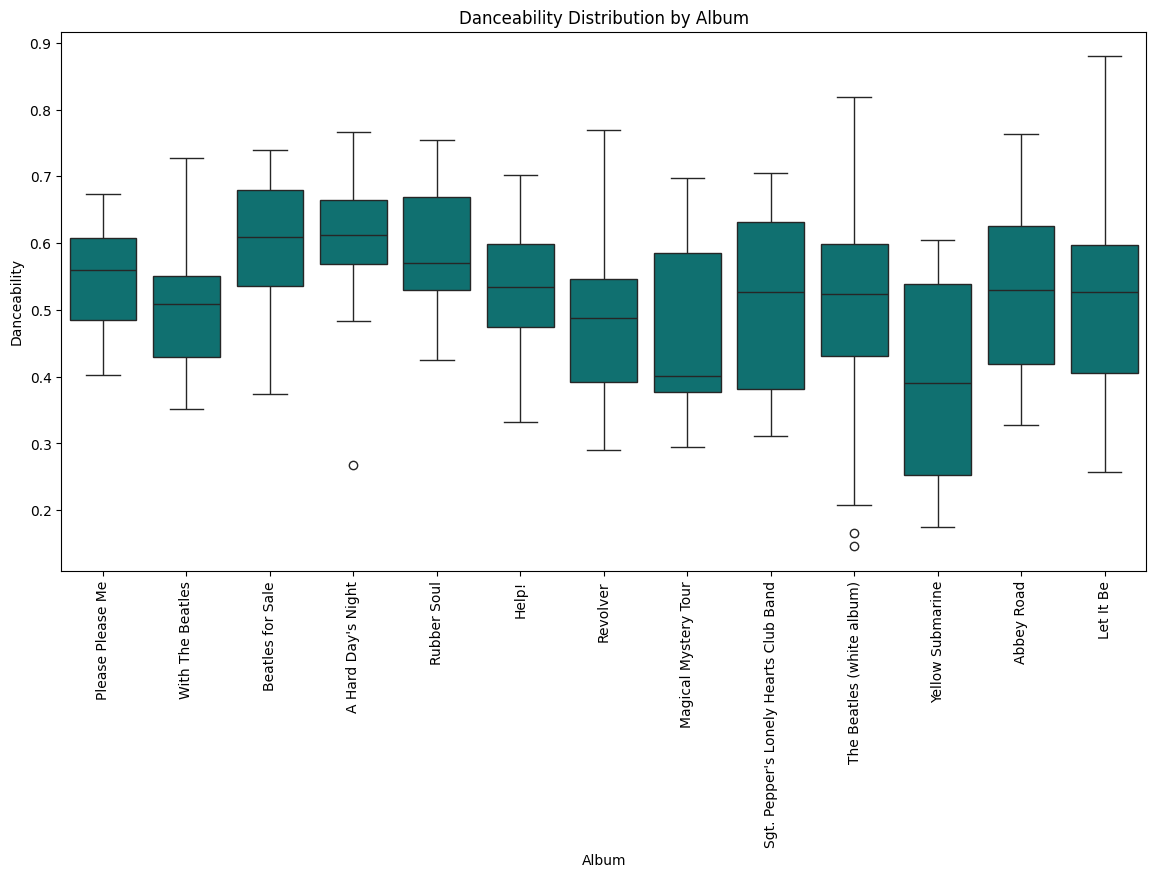

In [56]:
# danceability boxplot
plt.figure(figsize=(14,7))
sns.boxplot(data=beatles, x='album', y='danceability', color = 'teal')
plt.xticks(rotation=90)
plt.title("Danceability Distribution by Album")
plt.xlabel("Album")
plt.ylabel("Danceability")
plt.show()

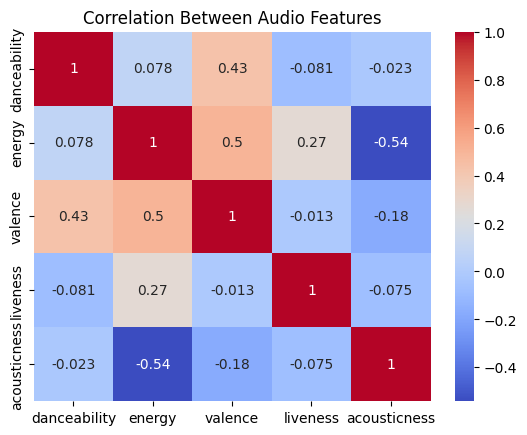

In [9]:
# correlation heatmap

corr = beatles[['danceability','energy','valence','liveness','acousticness']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Audio Features")
plt.show()

/var/folders/20/_l_bvg0n1sn87m86nw5jlvh40000gn/T/ipykernel_39442/3687022895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=beatles, x='album', palette = 'bright', order = beatles['album'].value_counts().index)


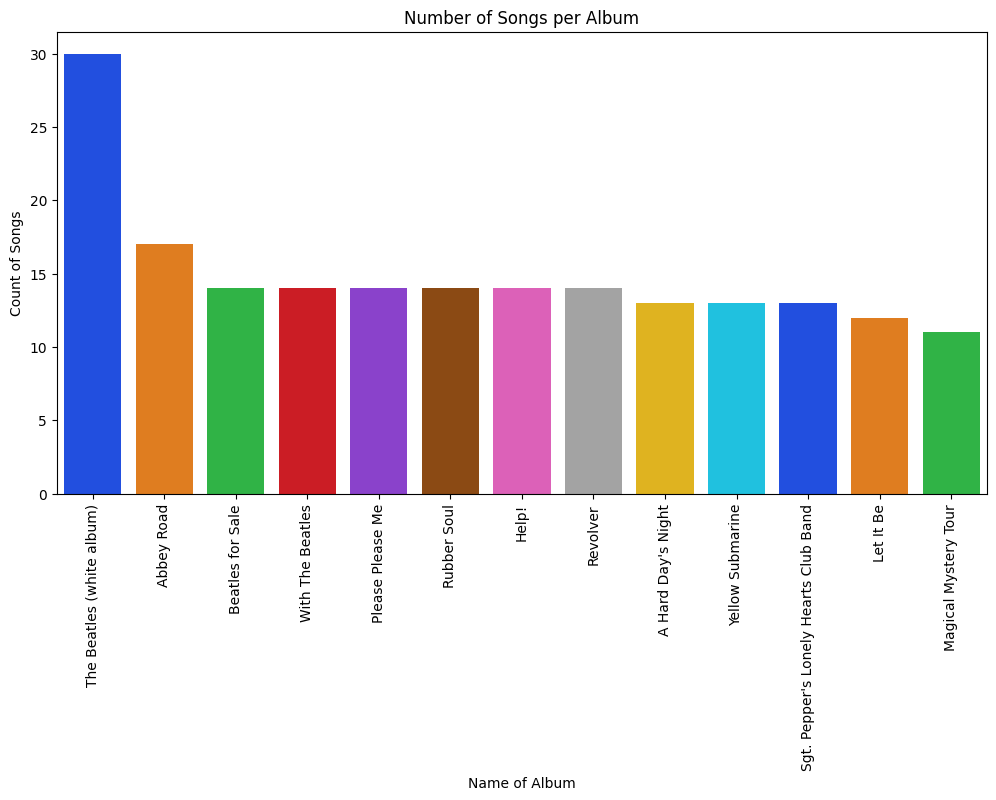

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=beatles, x='album', palette = 'bright', order = beatles['album'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of Songs per Album")
plt.ylabel("Count of Songs")
plt.xlabel("Name of Album")
plt.show()

In [18]:
# analyze it

#print(beatles['energy'].isnull().sum())

from sklearn.linear_model import LinearRegression
X = beatles[['year']]
y = beatles['danceability']
model = LinearRegression().fit(X, y)
print("Slope:", model.coef_[0], "Intercept:", model.intercept_)

Slope: -0.012675230252350213 Intercept: 25.44227372738545


In [19]:
# predicted values

beatles['predicted_danceability'] = model.predict(X)

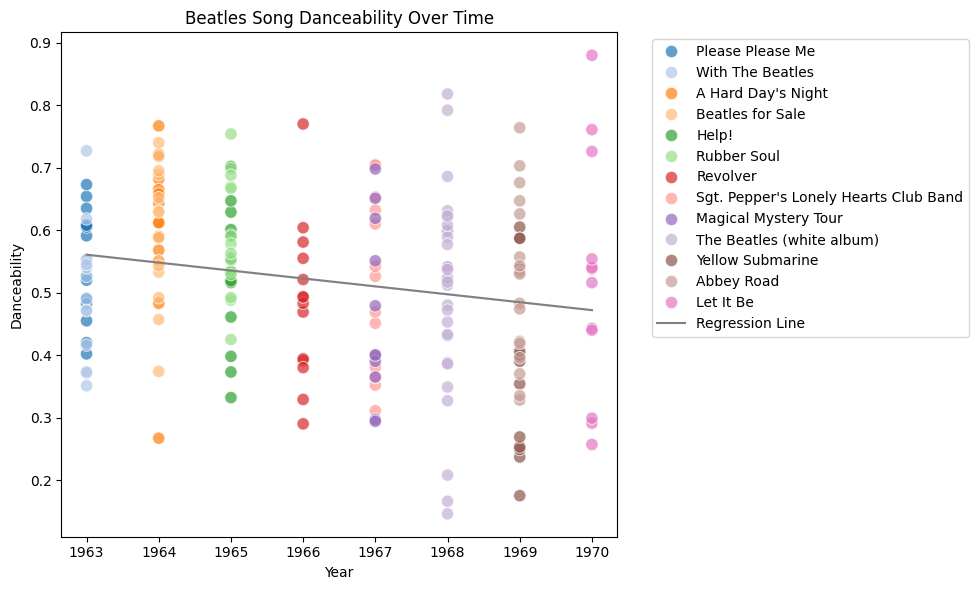

In [20]:
# make scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(data=beatles, x='year', y='danceability', hue='album', palette='tab20', s=80, alpha=0.7)
sns.lineplot(data=beatles, x='year', y='predicted_danceability', color='grey', label='Regression Line')
plt.title("Beatles Song Danceability Over Time")
plt.xlabel("Year")
plt.ylabel("Danceability")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/20/_l_bvg0n1sn87m86nw5jlvh40000gn/T/ipykernel_39442/3460597939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=album_avg, x='album', y='energy', palette='pastel')


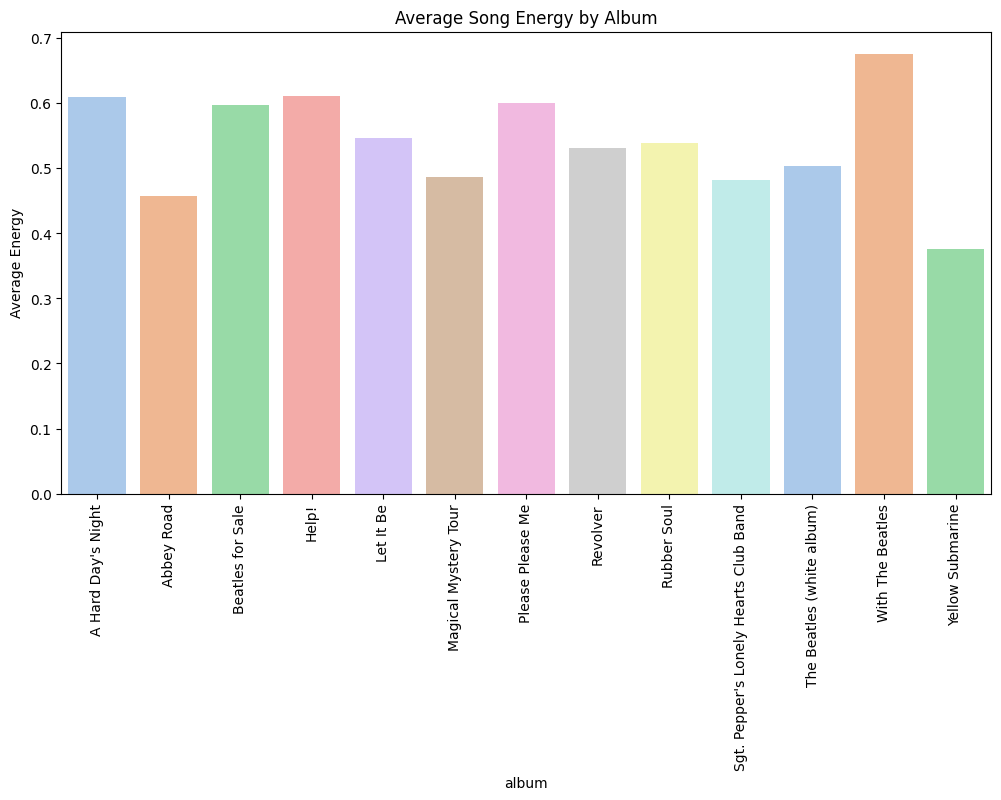

In [15]:
# make line chart

album_avg = beatles.groupby('album')['energy'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=album_avg, x='album', y='energy', palette='pastel')
plt.xticks(rotation=90)
plt.title("Average Song Energy by Album")
plt.ylabel("Average Energy")
plt.show()

/var/folders/20/_l_bvg0n1sn87m86nw5jlvh40000gn/T/ipykernel_39442/2264970725.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ordered_albums = beatles.groupby('album')['year'].min().sort_values().index.tolist()
/Users/megdanahy/Desktop/Beatles_Analysis/venv/lib/python3.12/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 1600x1000 with 0 Axes>

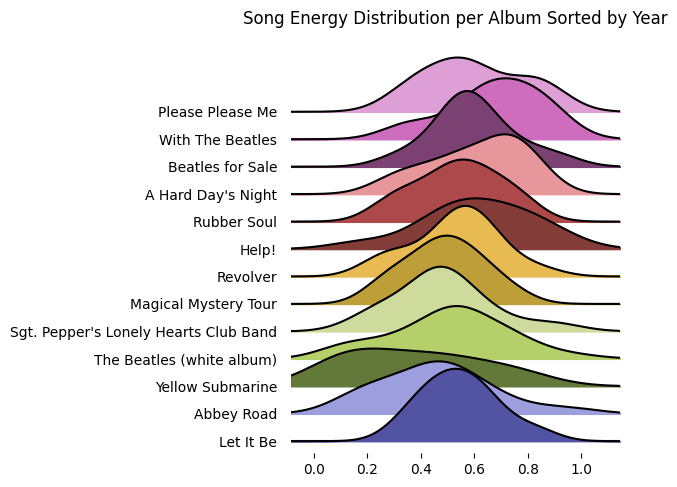

In [69]:
# energy dist. per album sorted by year
import joypy

ordered_albums = beatles.groupby('album')['year'].min().sort_values().index.tolist()

beatles['album'] = pd.Categorical(beatles['album'], categories=ordered_albums, ordered=True)

plt.figure(figsize=(16,10))
joypy.joyplot(
    beatles,
    by='album',
    column='energy',
    colormap=plt.cm.tab20b_r
)
plt.title("Song Energy Distribution per Album Sorted by Year")
plt.show()

In [28]:
# most danceable song per album
highest_energy = beatles.loc[beatles.groupby('album')['energy'].idxmax()]
highest_energy_sorted = highest_energy.sort_values('energy', ascending=True)

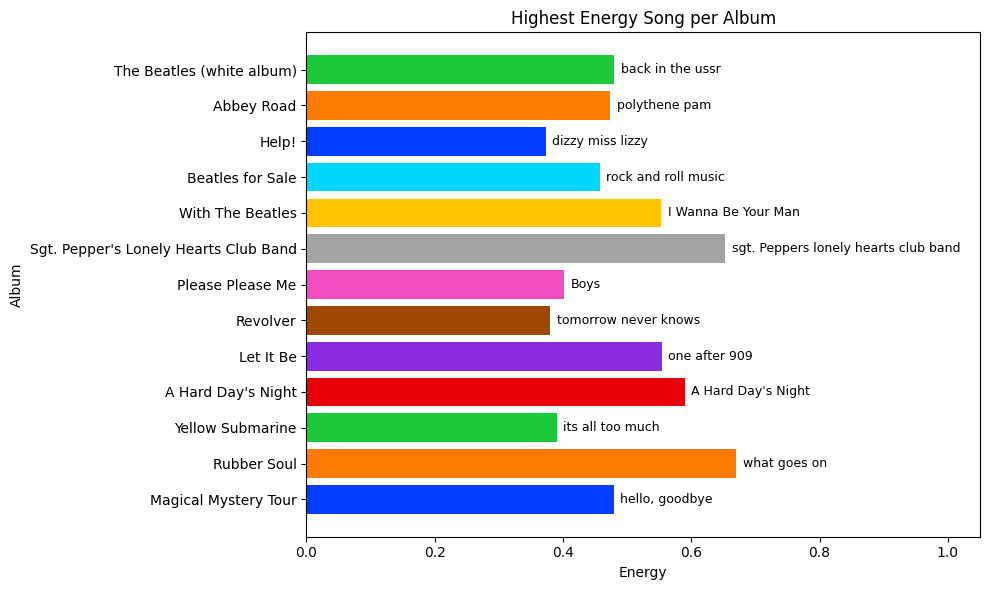

In [29]:
# make plot
plt.figure(figsize=(10,6))
bars = plt.barh(
    y=highest_energy_sorted['album'],
    width=highest_energy_sorted['danceability'],
    color=sns.color_palette("bright", len(highest_energy_sorted))
)

# Step 4: Add song names on bars
for bar, song in zip(bars, highest_energy_sorted['song']):
    plt.text(
        bar.get_width() + 0.01,       # small offset to the right of the bar
        bar.get_y() + bar.get_height()/2,
        song,
        va='center', ha='left', fontsize=9
    )

# Step 5: Labels and title
plt.xlabel("Energy")
plt.ylabel("Album")
plt.title("Highest Energy Song per Album")
plt.xlim(0, 1.05)  # slightly above 1 to fit text
plt.tight_layout()
plt.show()
